---
author: Brian Kwon
format: 
    html: 
        embed-resources: true
---

# Lab-3.1: Seaborn & EDA

**Instructions**

Read and work through all tutorial content and do all exercises below using python

**Submission**:

* You need to upload ONE document to Canvas when you are done
  * A PDF (or HTML) of the completed `.ipynb` document (python submission)
* The final uploaded version should NOT have any code-errors present
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

`You CAN use code from lab demonstrations, when appropriate`

## Import packages

In [5]:
# IMPORT
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import missingno as msno

## Data import 

In [6]:
# LOAD DATA 
df=sns.load_dataset("titanic", cache=True)
print(df.head(5))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [7]:
# SAVE THE NUMBER OF ROWS AND COLUMNS FOR LATER
Nr0=len(df.index)
Nc0=len(df.columns)
print("Nrows = ",Nr0,"\nNcol=",Nc0,"\nMatrix entries = ", Nr0*Nc0)

Nrows =  891 
Ncol= 15 
Matrix entries =  13365


## Assignment

### Part-1: Clean-up NaN

<Axes: >

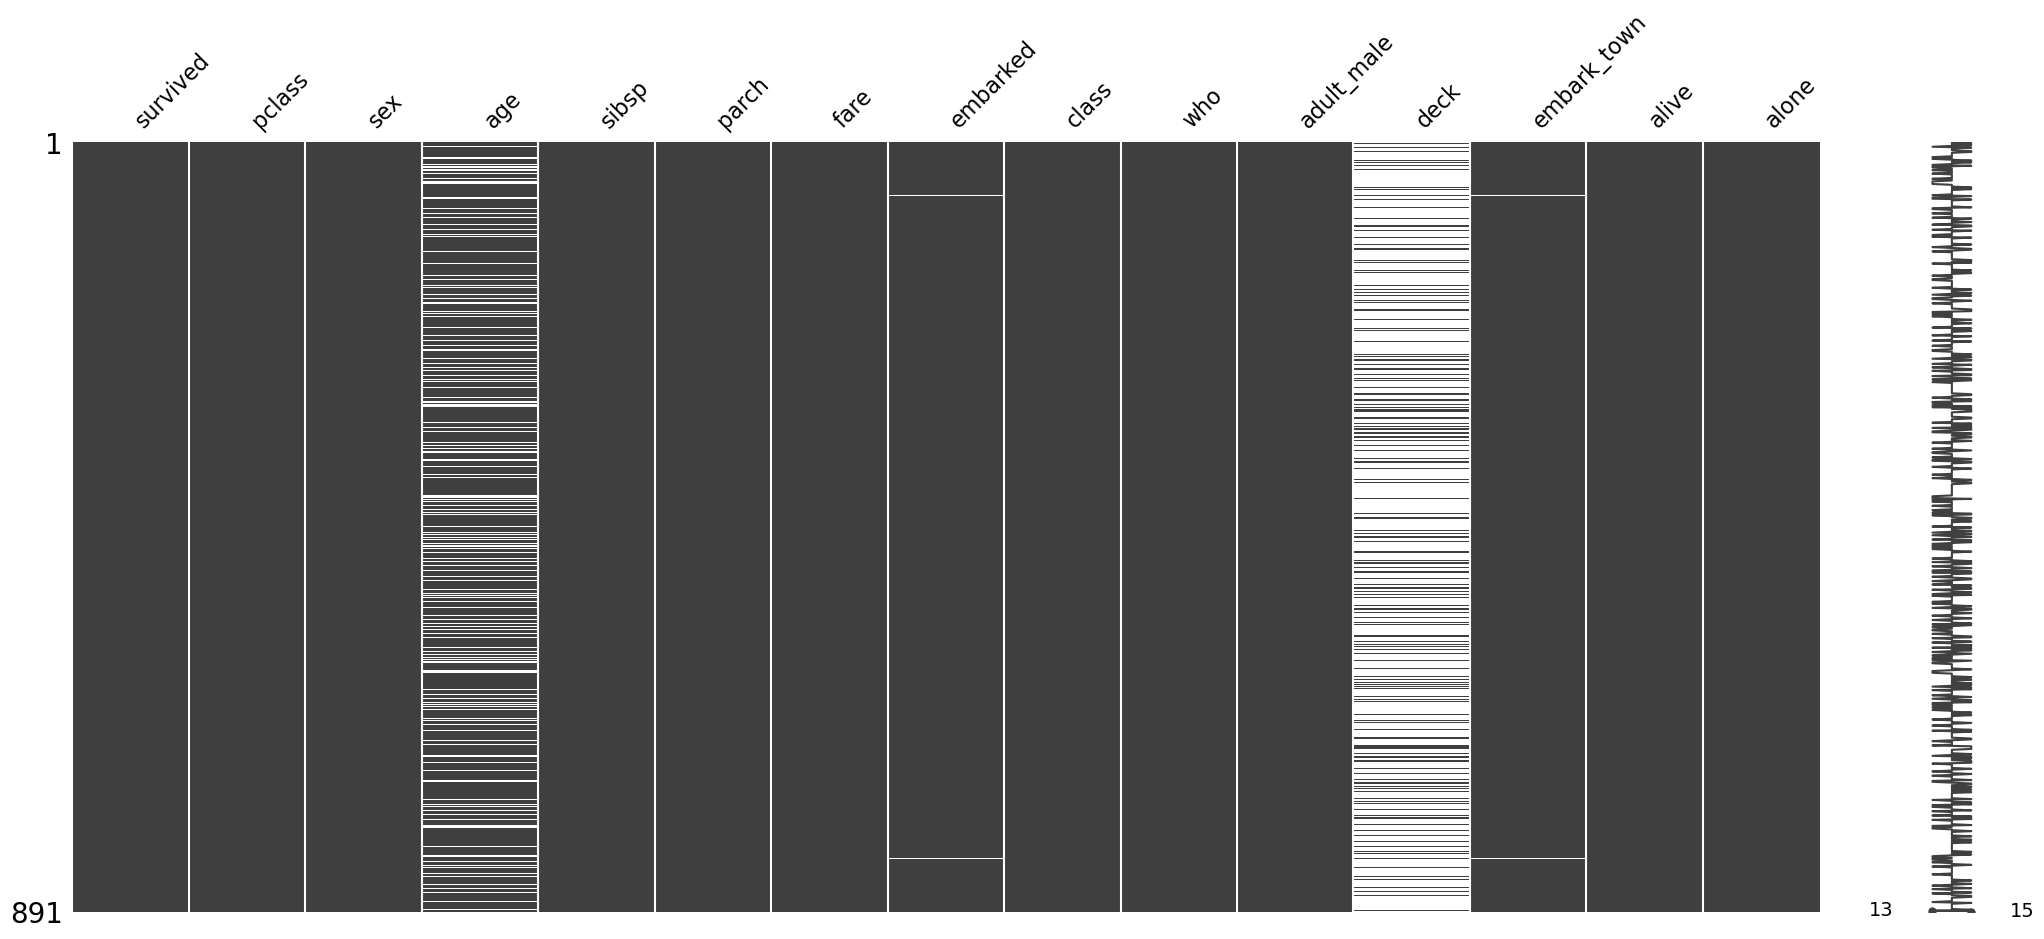

In [8]:
# Visualize missing values: (using missingno, or similar)
# If you do not know how to do this, try googling "how to visualize missing values in dataframe in python"

msno.matrix(df)

In [9]:
# count the number of missing/NaN values in each column

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
## DROP COLUMN WITH MORE THAN 500 NAN

df = df.loc[:, list(df.isnull().sum()<500)]
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [11]:
## DROP ANY ROW WITH NAN 

df = df.dropna()

In [12]:
# DOUBLE CHECK: OUTPUT NUMBER OF NAN

df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [13]:
# COMPUTE THE FRACTION OF DATA REMAINING AFTER NAN REMOVAL 
print("ORIGINAL")
print("Nrows = ",Nr0,"\nNcol=",Nc0,"\nMatrix entries = ", Nr0*Nc0)
print("")
print("NAN REMOVED")
Nr1=len(df.index)
Nc1=len(df.columns)
print("Nrows = ",Nr1,"\nNcol=",Nc1,"\nMatrix entries = ", Nr1*Nc1)
print("Percentage remaining:",(Nr1*Nc1)/(Nr0*Nc0)*100)

ORIGINAL
Nrows =  891 
Ncol= 15 
Matrix entries =  13365

NAN REMOVED
Nrows =  712 
Ncol= 14 
Matrix entries =  9968
Percentage remaining: 74.58286569397681


### Part-2: Numerical exploration

Insert code to re-create the output below: 

In [14]:
print("----------------------")
print("GENERAL INFORMATION:")
print("----------------------")
print("number of rows:",Nr1)
print("number of col:", Nc1)
print("keys:",df.columns)

----------------------
GENERAL INFORMATION:
----------------------
number of rows: 712
number of col: 14
keys: Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 69.0+ KB


In [16]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [17]:
# RUN CROSS-TABULATION-1
# (if you are un-familiar, google "what is cross tabulation" and "how to run cross tabulation in pandas")

pd.crosstab(df["class"],df["alive"])

alive,no,yes
class,,
First,64,120
Second,90,83
Third,270,85


In [18]:
# RUN CROSS-TABULATION-2
# (if you are un-familiar, google "what is cross tabulation" and "how to run cross tabulation in pandas")

pd.crosstab(df["who"],df["alive"])

alive,no,yes
who,,
child,34,49
man,341,72
woman,49,167


### Part-3: Exploration of univariate continuous variables

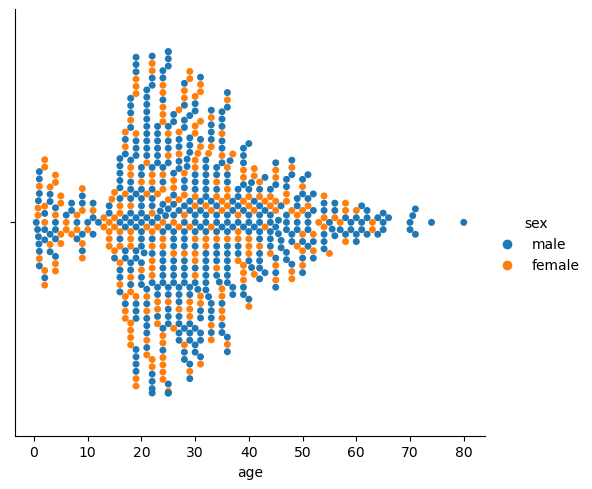

In [19]:
# AGE-DISTRIBUTION: INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 

sns.catplot(data=df, kind="swarm", x="age", hue="sex")

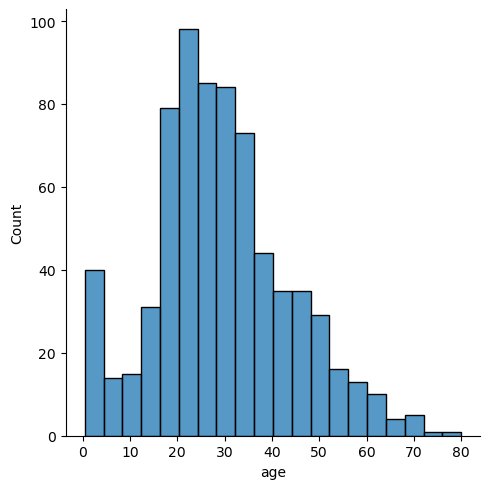

In [20]:
sns.displot(data=df,x="age")

<Axes: xlabel='age', ylabel='who'>

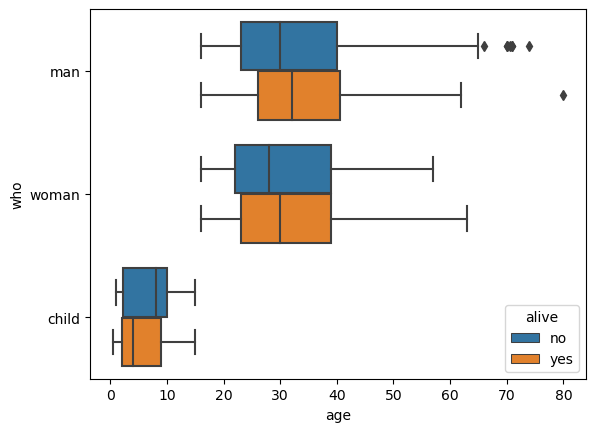

In [21]:
# AGE-DISTRIBUTION: INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 

sns.boxplot(x='age', y='who', data=df, hue="alive")

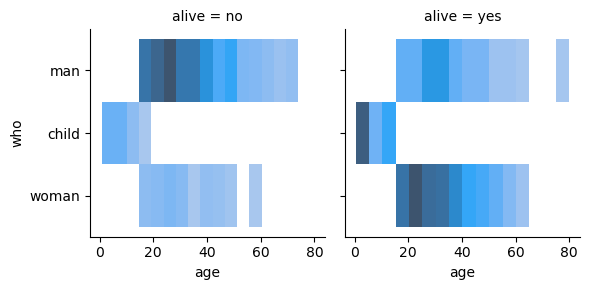

In [22]:
# AGE-DISTRIBUTION: INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 
#Trivariate histogram with two categorical variables

g = sns.FacetGrid(data=df, col="alive")
g.map_dataframe(sns.histplot, x="age", y="who")

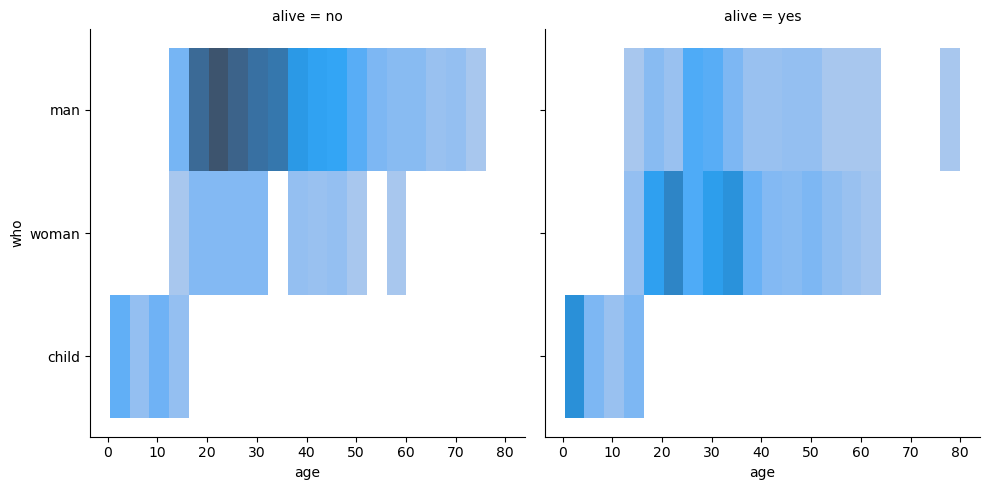

In [23]:
sns.displot(data=df, x="age", y="who", col="alive")

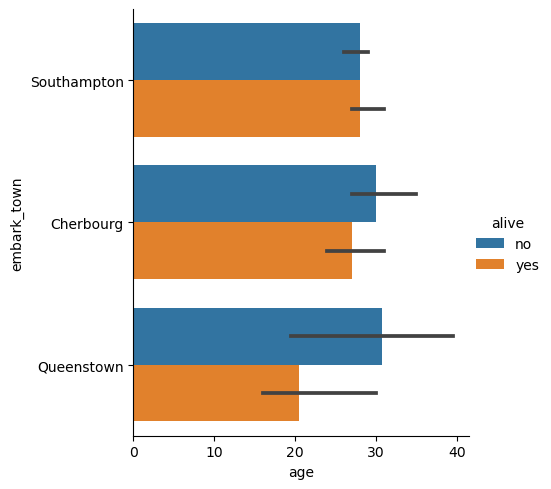

In [24]:
# AGE-CENTERAL TENDENCY: INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 
# estimator=median: Statistical function to estimate within each categorical bin.

sns.catplot(data=df, kind="bar",x="age",y="embark_town",hue="alive",estimator="median")

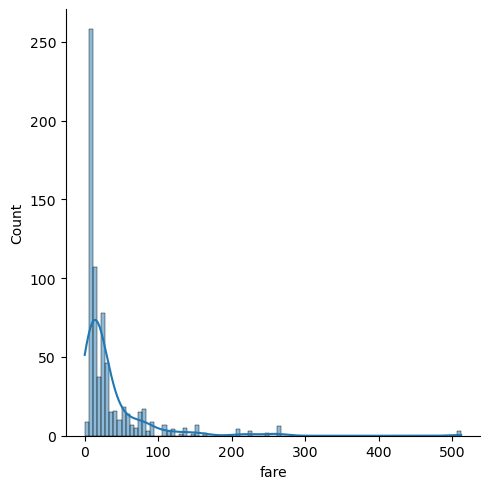

In [25]:
# FARE-DISTRIBUTION: INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 

sns.displot(data=df,x="fare",kde=True)

<Axes: xlabel='alive', ylabel='fare'>

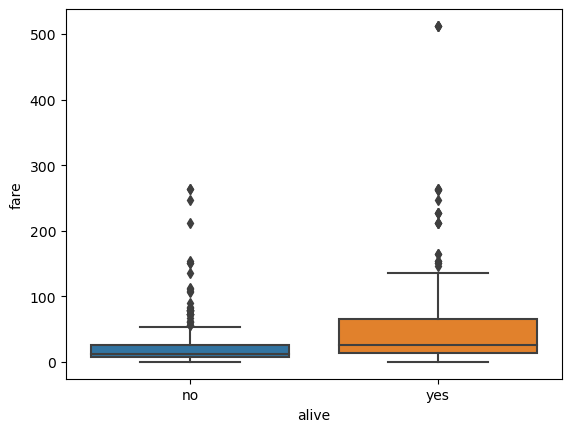

In [27]:
# FARE-DISTRIBUTION: INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 

sns.boxplot(x='alive', y='fare', data=df)

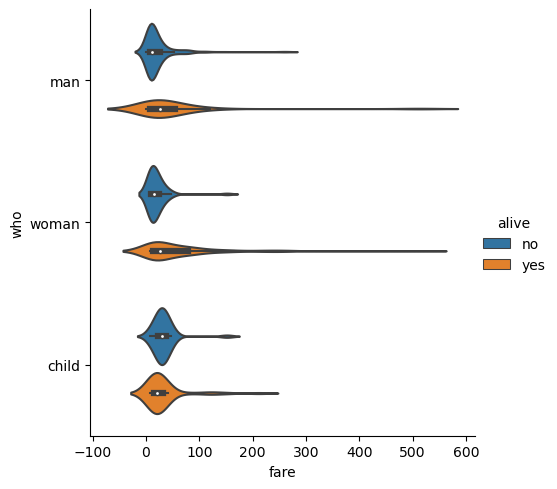

In [23]:
# FARE-DISTRIBUTION: INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 

sns.catplot(data=df,kind="violin",x="fare",y="who",hue="alive")

<Axes: xlabel='fare', ylabel='who'>

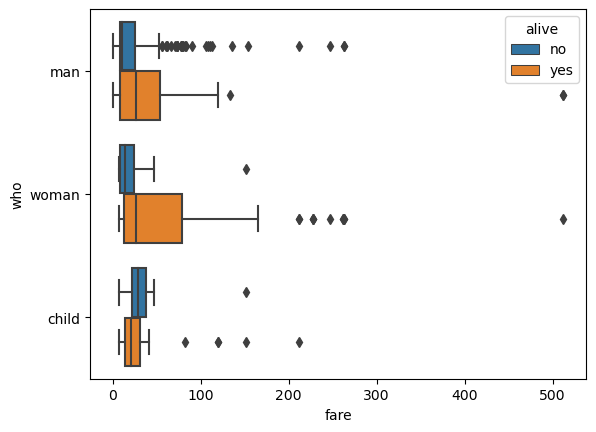

In [24]:
# FARE-DISTRIBUTION: INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 

sns.boxplot(data=df,x="fare",y="who",hue="alive")

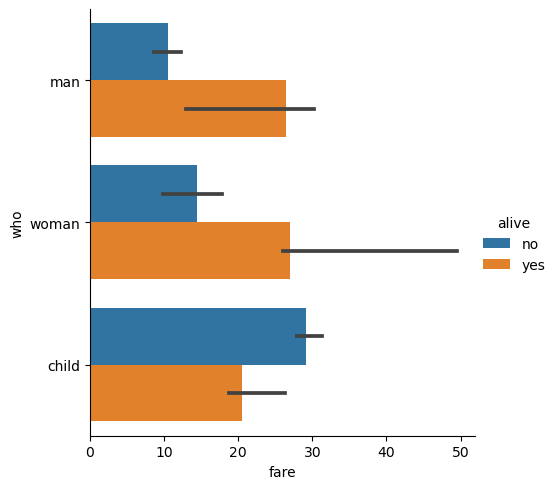

In [25]:
# FARE-CENTERAL TENDENCY: INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 
# estimator=median: Statistical function to estimate within each categorical bin.

sns.catplot(data=df,kind="bar",x="fare",y="who",hue="alive",estimator="median")

### Part-4: Exploration of univariate categorical variables

<Axes: xlabel='class', ylabel='count'>

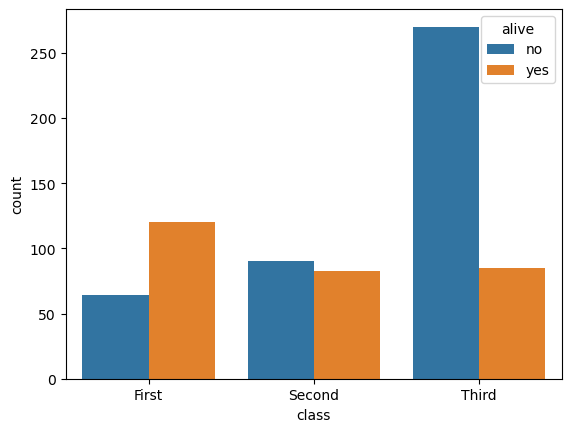

In [26]:
# COUNT PLOT: INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 

sns.countplot(data=df,x="class",hue="alive")

<Axes: xlabel='count', ylabel='who'>

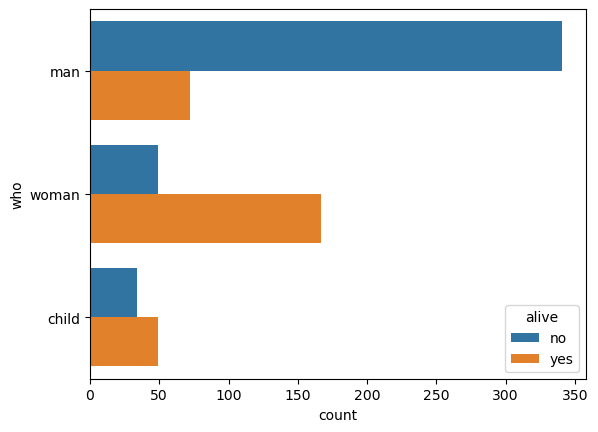

In [27]:
# COUNT PLOT: INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 

sns.countplot(data=df,y="who",hue="alive")

### Part-5: Multivariate 

This data set is mostly categorical (both binary and multi-class), so the Multivariate continuous information content is limited 

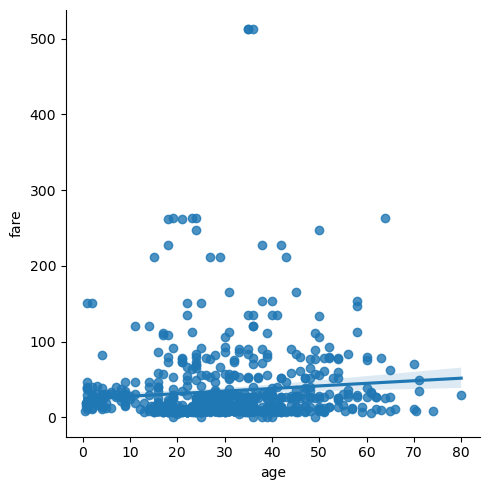

In [28]:
# INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 
# SEE IF THERE IS ANY CORRELATION BETWEEN THE CONTINOUS VARIABLES

sns.lmplot(data=df, x="age",y="fare")

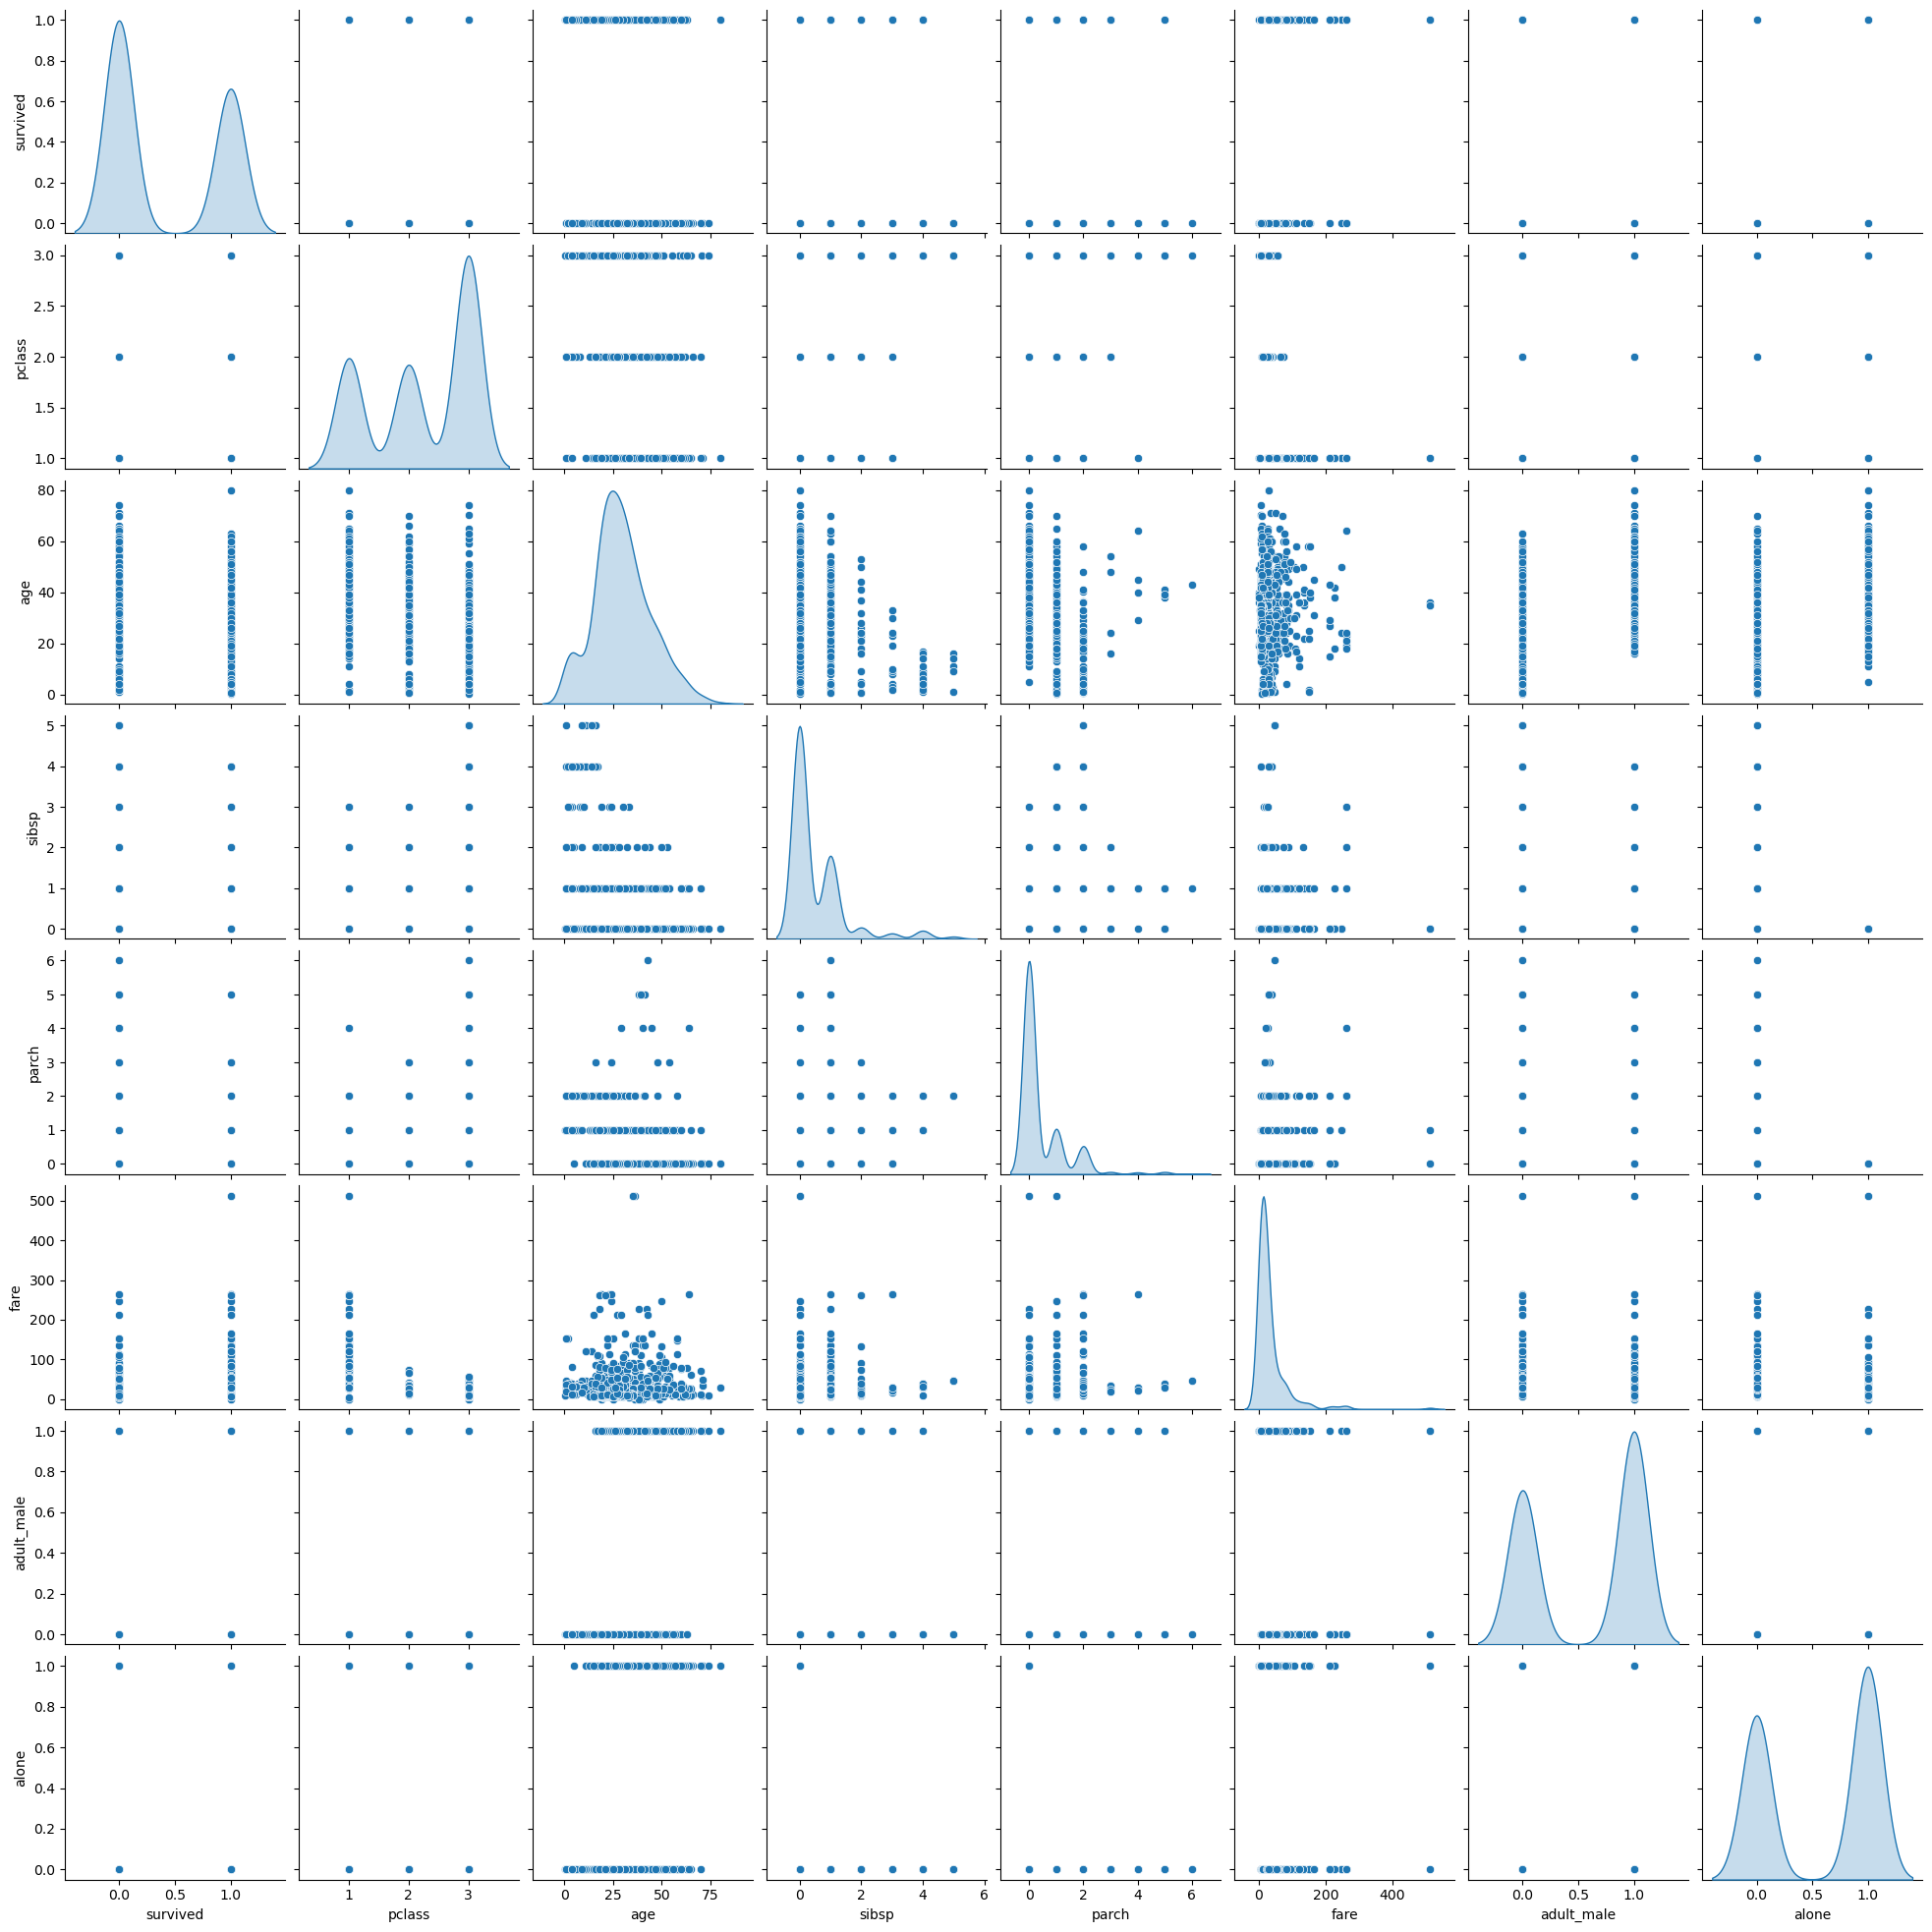

In [29]:
# INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 
# Basically meaningless (since everything is categorical)

sns.pairplot(df, diag_kind="kde")

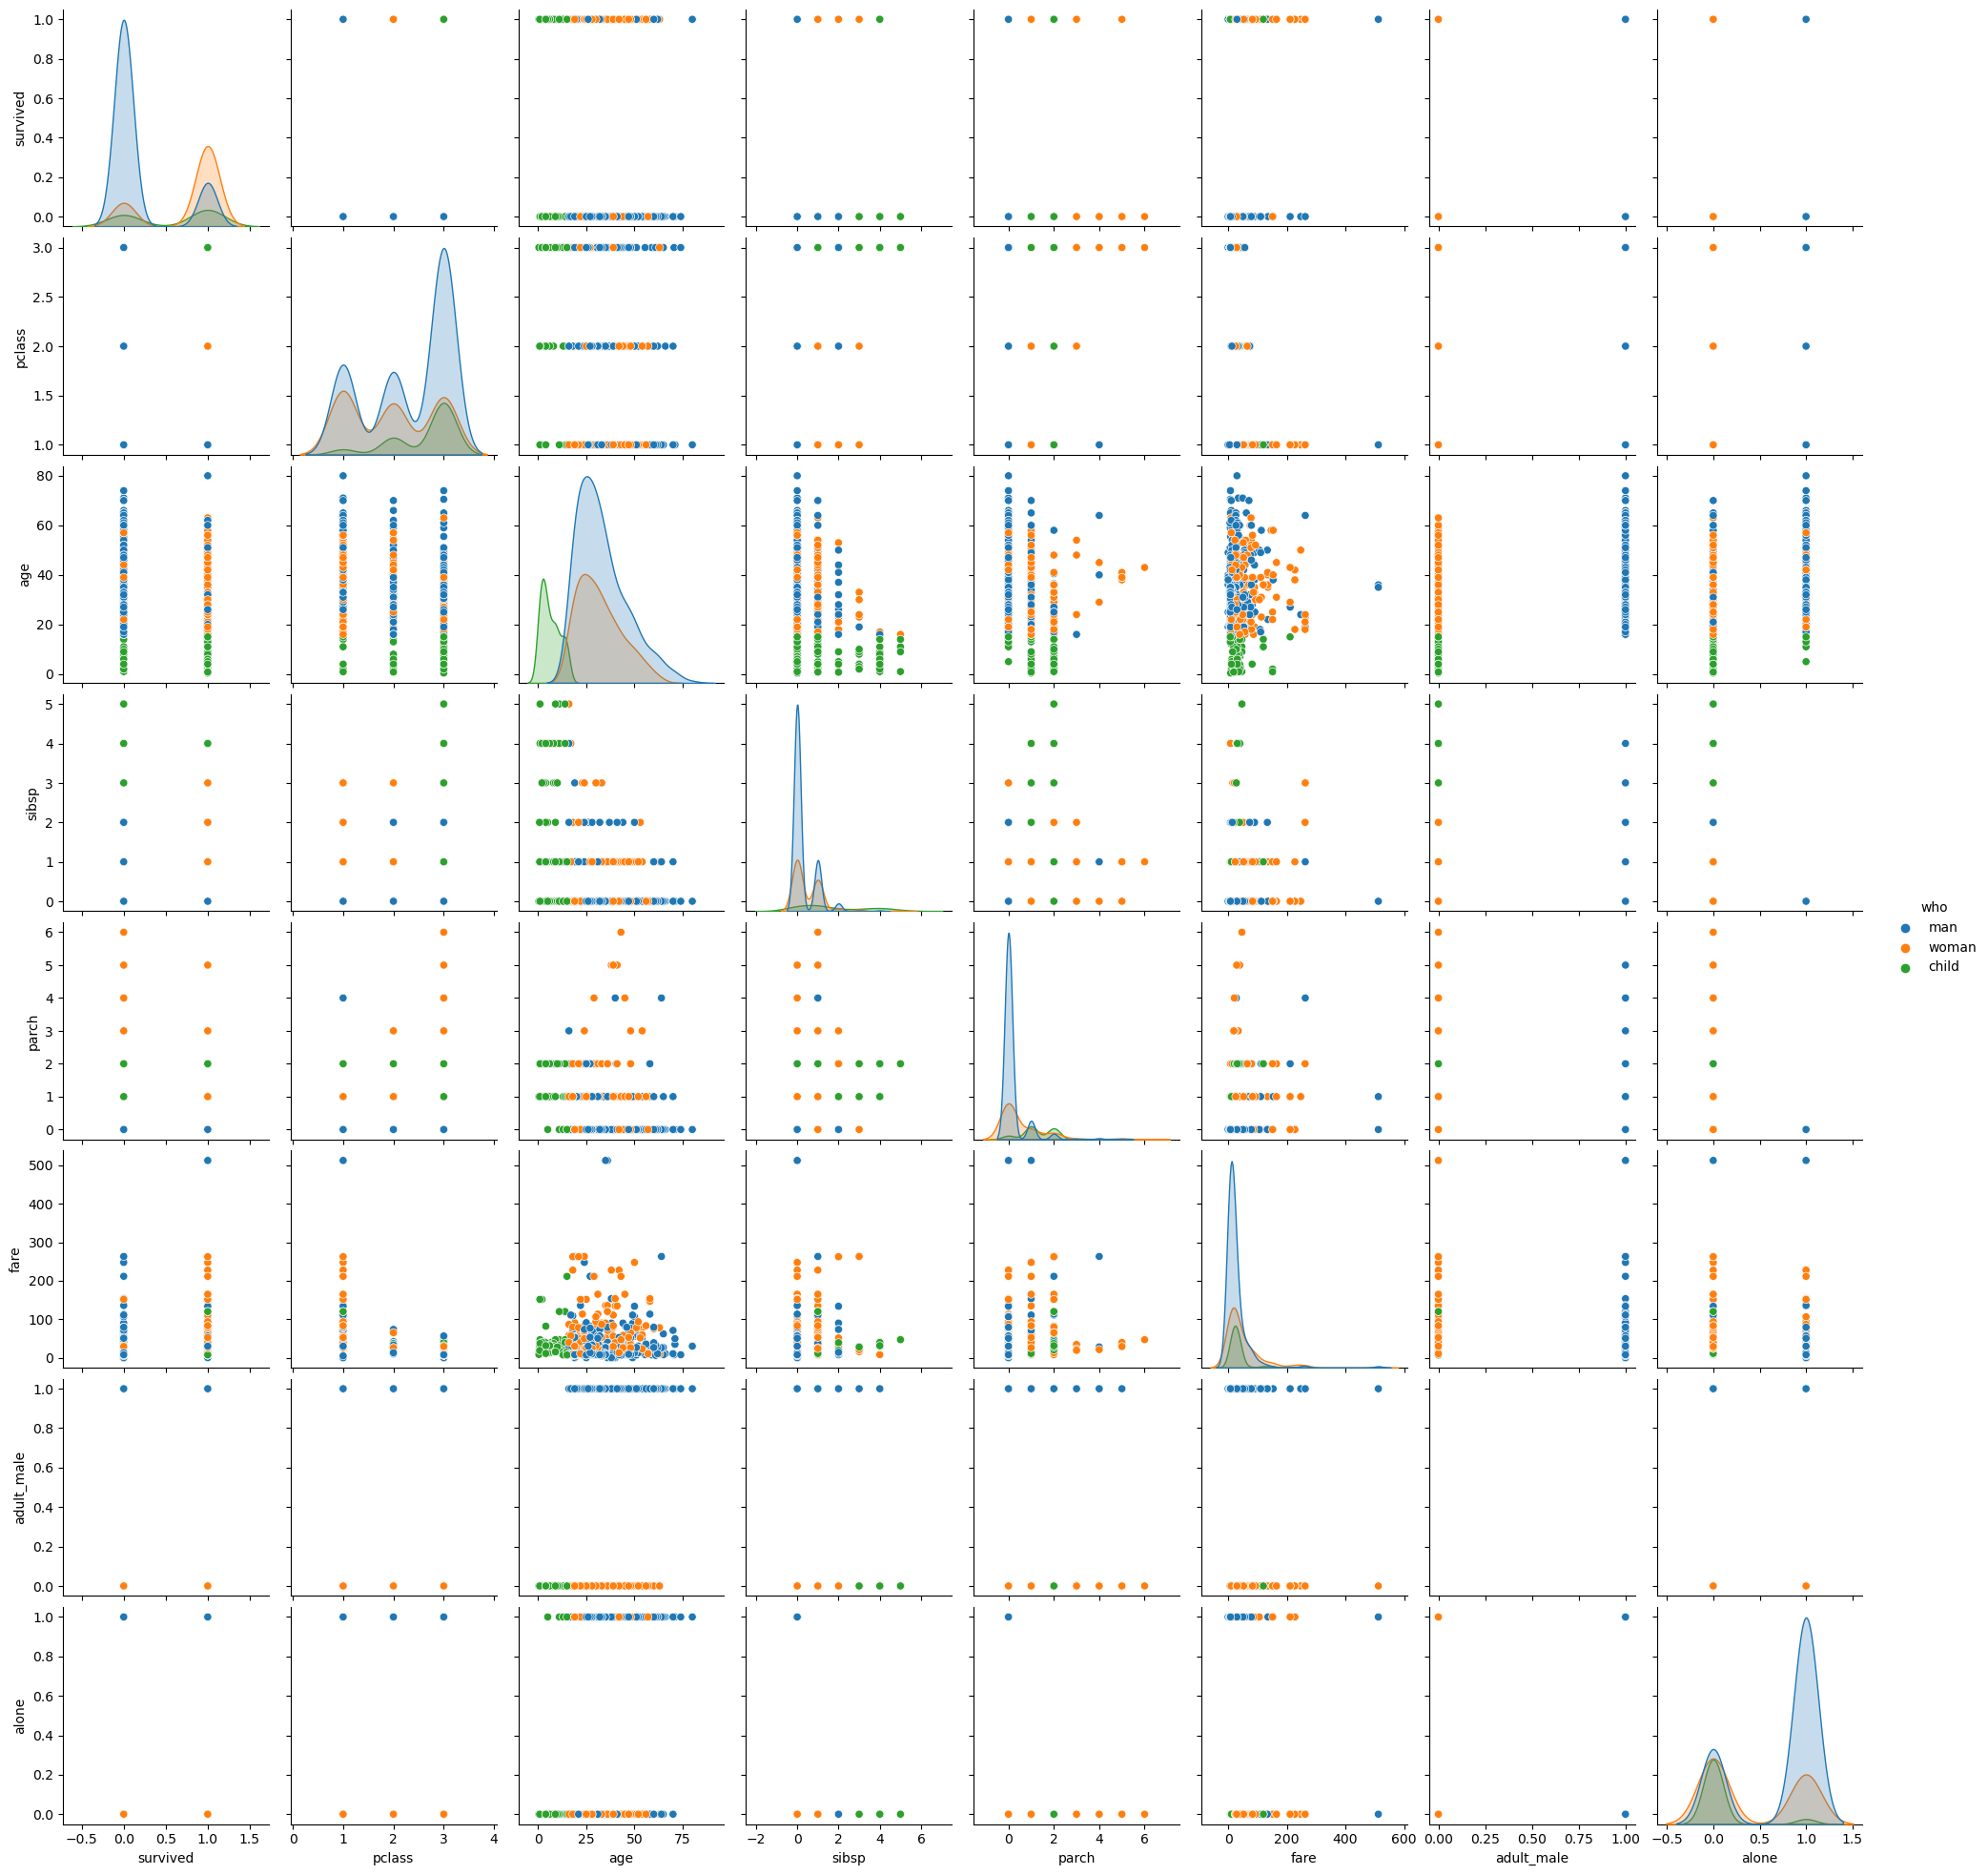

In [30]:
# INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 
# Basically meaningless (since everything is categorical)

sns.pairplot(df, diag_kind="kde", hue="who")

In [31]:
# INSERT CODE TO RE-CREATE THE FOLLOWING PLOTS 
# Basically meaningless (since everything is categorical)

df.corr(numeric_only=True)


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,-0.551151,-0.199741
pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,0.094635,0.150576
age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,0.286543,0.195766
sibsp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,-0.313016,-0.629408
parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,-0.365580,-0.577109
fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,-0.177446,-0.262799
adult_male,-0.551151,0.094635,0.286543,-0.313016,-0.365580,-0.177446,1.000000,0.400718
alone,-0.199741,0.150576,0.195766,-0.629408,-0.577109,-0.262799,0.400718,1.000000


<Axes: >

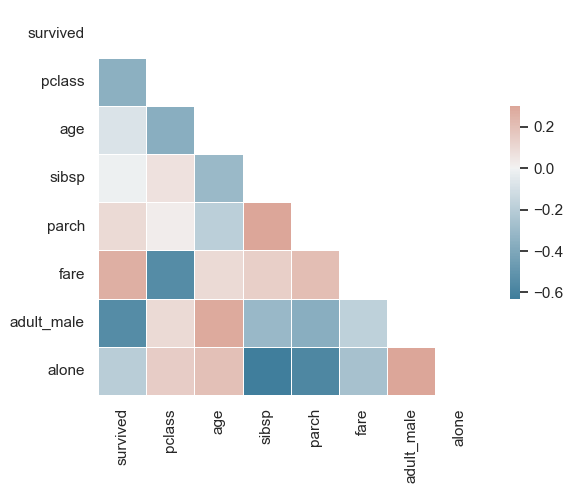

In [32]:
sns.set_theme(style="white")
corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool)) 
f, ax = plt.subplots(figsize=(7, 5))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})